# Análise de Gorjetas

Este arquivo foi produzido como parte do estudo de analise exploratória com pandas e seaborn, baseado na formação "Python pada Data Science" da Alura. A base de dados utilizada pode ser encontrada em no diretório 'data\tips.csv'

# Importando dados

In [93]:
import pandas as pd

In [94]:
gorjetas = pd.read_csv('data/tips.csv', sep = ',')

gorjetas

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [95]:
#renomeando as colunas
novas_colunas = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'periodo_do_dia',
    'size': 'total_de_pessoas'    
}

gorjetas = gorjetas.rename(columns = novas_colunas)

In [96]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,periodo_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [97]:
#traduzindo conteúdo
gorjetas.sobremesa.unique() #valores em sobremesa

array(['No', 'Yes'], dtype=object)

In [98]:
gorjetas.sobremesa = gorjetas.sobremesa.map({'No': 'Não', 'Yes': 'Sim'})

In [99]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,periodo_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [100]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [101]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map({'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri': 'Sexta'})

In [102]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,periodo_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [103]:
gorjetas.periodo_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [104]:
gorjetas.periodo_do_dia = gorjetas.periodo_do_dia.map({'Dinner': 'Jantar', 'Lunch': 'Almoço'})

In [105]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,periodo_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


Vale ressaltar, que esse procedimento de tradução apenas foi realizado com o propósito de praticar esse tipo de manipulação dos dados

# Explorando os dados

In [106]:
import seaborn as sns

In [107]:
print(f'A base de dados possui {gorjetas.shape[0]} registros, da seguinte forma:\n')
gorjetas.info()

A base de dados possui 244 registros, da seguinte forma:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   periodo_do_dia    244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


## Valor da conta e gorjeta

Vamos começar buscando entender como se comporta o valor da gorjeta, em relação ao total da conta

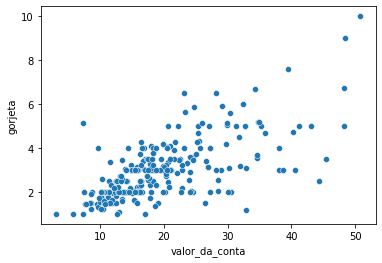

In [108]:
#Gráfico de dispersão
valor_conta_gorjeta_plot = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

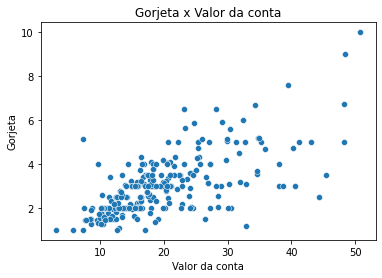

In [109]:
valor_conta_gorjeta_plot.set(xlabel = 'Valor da conta', ylabel = 'Gorjeta') #definindo o nome dos eixos
valor_conta_gorjeta_plot.set_title('Gorjeta x Valor da conta') #definindo o título do gráfico
valor_conta_gorjeta_plot.get_figure() #chamando o gráfico a partir da variável

Parece que conforme o valor da conta aumenta, o valor da gorjeta também aumenta. No entanto, parece haver mais gorjetas para valores menores

In [110]:
valor_conta_gorjeta_plot.get_figure().savefig('plot/valor_conta_gorjeta.png') #salvando figura

### Proporção gorjeta por valor da conta

In [111]:
gorjetas['gorjeta_relativa_conta'] = (gorjetas['gorjeta']/gorjetas['valor_da_conta']).round(2)

In [112]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,periodo_do_dia,total_de_pessoas,gorjeta_relativa_conta
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


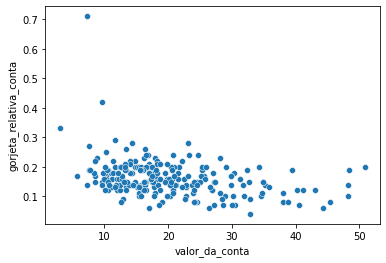

In [113]:
proporcao_gorjeta_valor_conta_plot = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta_relativa_conta', data = gorjetas)

Aqui já é possível vermos que, apesar do valor da gorjeta aumentar com o valor da conta, a proporção dessa gorjeta em relação ao valor da conta é menor

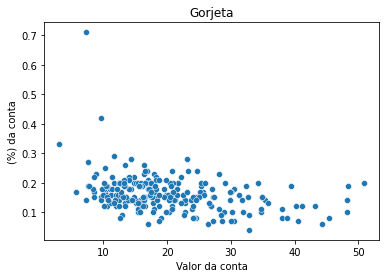

In [114]:
proporcao_gorjeta_valor_conta_plot.set(xlabel = 'Valor da conta', ylabel = '(%) da conta')
proporcao_gorjeta_valor_conta_plot.set_title('Gorjeta')
proporcao_gorjeta_valor_conta_plot.get_figure()

In [115]:
proporcao_gorjeta_valor_conta_plot.get_figure().savefig('plot/proporcao_gorjeta_conta.png')

## Sobremesa e Gorjeta

Será que pedir ou não sobremesa influencia na gorjeta?

### Análise descritiva

In [116]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe() #descrição estatítica dos registros em que houve pedido de sobremesa

,valor_da_conta,gorjeta,total_de_pessoas,gorjeta_relativa_conta
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [117]:
gorjetas[gorjetas.sobremesa == 'Não'].describe() #descrição estatítica dos registros em que houve pedido de sobremesa

,valor_da_conta,gorjeta,total_de_pessoas,gorjeta_relativa_conta
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


### Análise visual

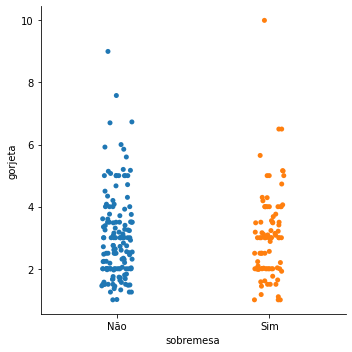

In [118]:
sns.catplot(x='sobremesa', y='gorjeta', data = gorjetas)

Esse gráfico, pode ser validado pelas descrições acima

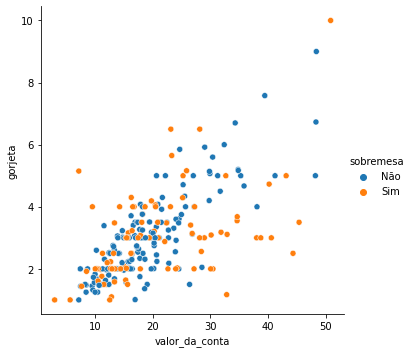

In [119]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

Agora conseguimos ver a relação entre valor e gorjeta, identificando quem pediu sobremesa

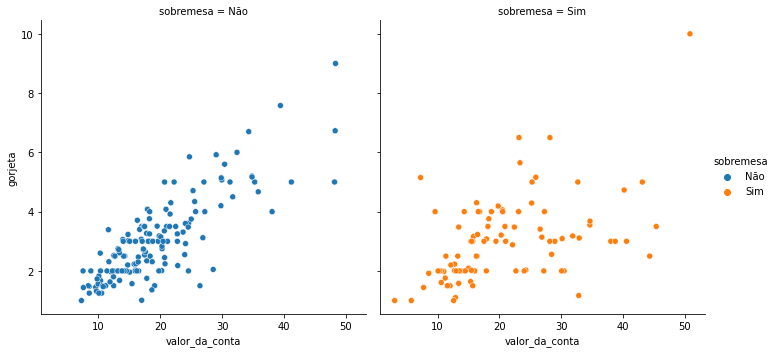

In [120]:
valor_gorjeta_sobremsa = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

A distribuição de quem pediu sobre mesa é mais despersa

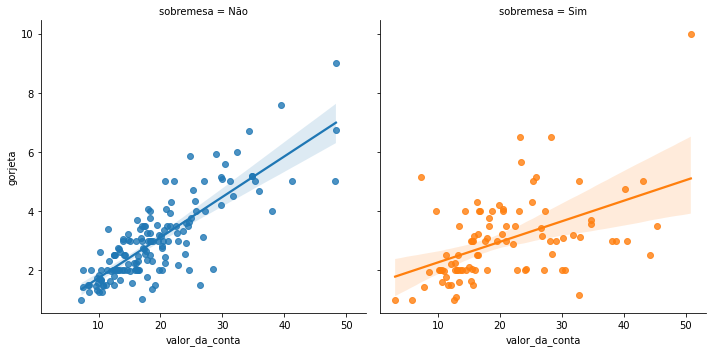

In [121]:
valor_gorjeta_sobremsa = sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

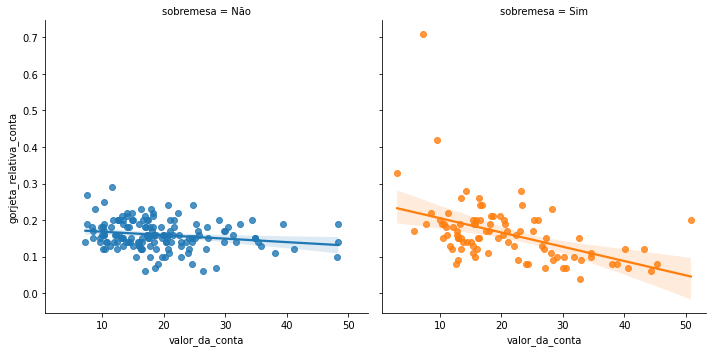

In [122]:
valor_proporcao_gorjeta_sobremsa = sns.lmplot(x='valor_da_conta', y='gorjeta_relativa_conta', hue='sobremesa', col='sobremesa', data=gorjetas)

Também parece que há diferença entre a proporção da gorjeta, e pedir ou não sobremesa

### Teste de Hipótese

H<sup>null</sup>

A distribuição (%) da conta dada de gorjeta é a mesma nos dois grupos

H<sup>alt</sup>

A distribuição da (%) da conta dada de gorjeta não é a mesma nos dois grupos

In [123]:
from scipy.stats import ranksums

In [124]:
com_sobremesa = gorjetas.query('sobremesa == "Sim"').gorjeta_relativa_conta
sem_sobremesa = gorjetas.query('sobremesa == "Não"').gorjeta_relativa_conta

In [125]:
r = ranksums(com_sobremesa, sem_sobremesa)

In [126]:
print(f'O valor de p-value é {r.pvalue} para comparação entre os grupos')

O valor de p-value é 0.5266635660124415 para comparação entre os grupos


A diferença entre pedir ou não sobremesa é insignificante

## Dia da semana e Gorjeta

### Dia da semana com mais gasto

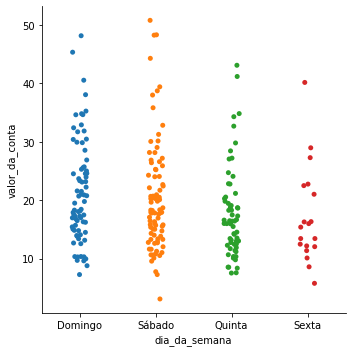

In [127]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data = gorjetas)

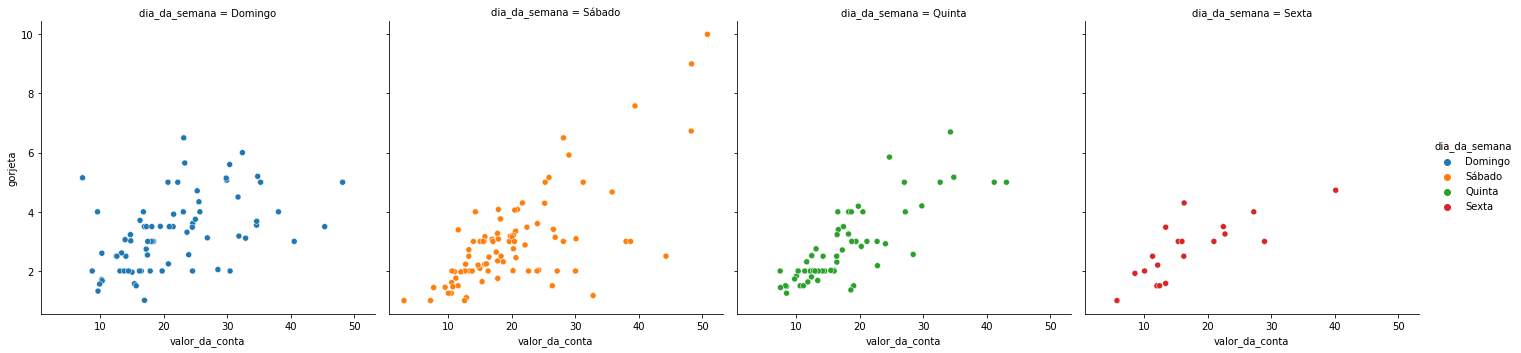

In [128]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

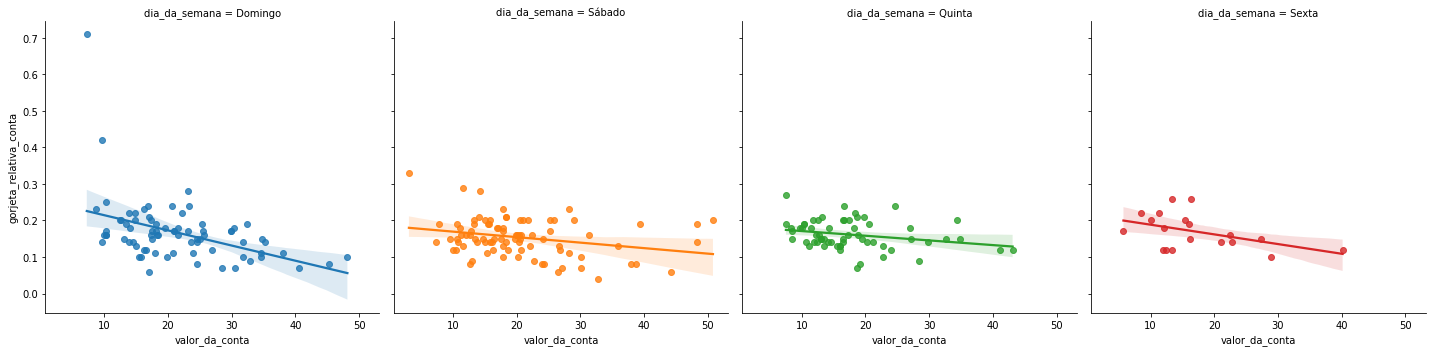

In [129]:
sns.lmplot(x='valor_da_conta', y='gorjeta_relativa_conta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [130]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print(f'A média geral das gorjetas é {media_geral_gorjetas}')

A média geral das gorjetas é 2.99827868852459


In [131]:
print('Médias por dias da semana')

medias_por_dia = gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'gorjeta_relativa_conta']]

medias_por_dia

Médias por dias da semana


,valor_da_conta,gorjeta,gorjeta_relativa_conta
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [132]:
print('A frequencia de cada dia é: \n')
gorjetas.dia_da_semana.value_counts()

A frequencia de cada dia é: 



Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

Apesar de no sábado termos mais registros, é no domingo que a média geral da gorjeta é maior

### Teste de hipótese

H<sup>null</sup>

A distribuição do valor da conta é igual para sábado e domingo

H<sup>alt</sup>

A distribuição do valor da conta não é igual no domingo

In [133]:
conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta
conta_domingo = gorjetas.query('dia_da_semana =="Domingo"').valor_da_conta

r2 = ranksums(conta_sabado, conta_domingo)

print(f'O p-value da comparação é {r2.pvalue}')

O p-value da comparação é 0.3576728477868443


A distribuição do valor da conta é igual nos dois dias

## Hora do dia e Gorjeta

<AxesSubplot:xlabel='periodo_do_dia', ylabel='valor_da_conta'>

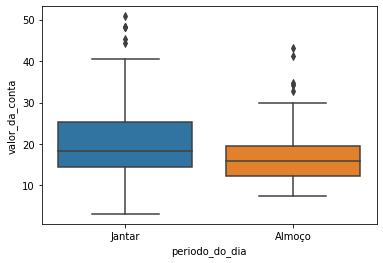

In [134]:
sns.boxplot(x='periodo_do_dia', y='valor_da_conta', data=gorjetas)

Observe que a mediana nos dois periodos é diferente

### Distribuição do almoço

c:\users\guto\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

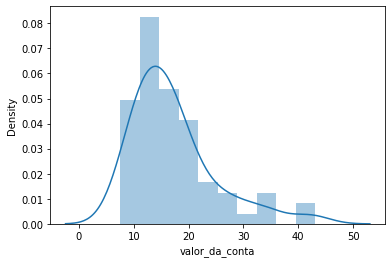

In [135]:
almoco = gorjetas.query('periodo_do_dia == "Almoço"').valor_da_conta

sns.distplot(almoco)

### Distribuição do Jantar

c:\users\guto\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

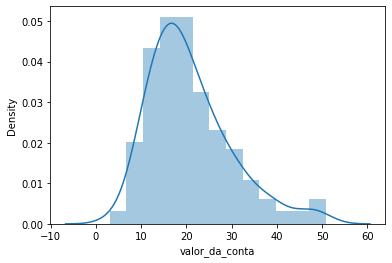

In [136]:
jantar = gorjetas.query('periodo_do_dia == "Jantar"').valor_da_conta

sns.distplot(jantar)

Vizualmente há diferença entre o valor da conta no Almoço e no Jantar

In [137]:
media_por_periodo = gorjetas.groupby(['periodo_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'gorjeta_relativa_conta']]

media_por_periodo

,valor_da_conta,gorjeta,gorjeta_relativa_conta
periodo_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


A média do valor da conta e da gorjeta são maiores que no almoço, enquanto que a porcentagem é maior no almoço

### Teste de hipótese

H<sup>null</sup>

A distribuição do valor da conta é igual para almoço e jantar

H<sup>alt</sup>

A distribuição do valor da conta não é igual no almoço e jantar

In [138]:
r3 = ranksums(jantar, almoco)

print(f'O p-value para a comparação é {r3.pvalue}')

O p-value para a comparação é 0.0011791039723641672


Por tanto, há diferença entre as ditribuições do almoço e jantar